<a href="https://colab.research.google.com/github/Zyeddd/filmrecommandation/blob/main/df_imdb_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import gdown as gd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url = 'https://drive.google.com/uc?id=1pARvg5mrwm1o1Fiosl8vEdTyHjvaWYB6'
gd.download(url,'df_imdb.csv',quiet=True)

df_imdb = pd.read_csv('df_imdb.csv')

In [3]:
df_imdb.head()

,titleID,title,year,duration,genre1_film,genre2_film,genre3_film,averageRating,numVotes,region,...,name_dir,nconst_act1,name_act1,genre_act1,nconst_act2,name_act2,genre_act2,nconst_act3,name_act3,genre_act3
0,tt0076276,Who's Singin' Over There?,1980,86.0,Adventure,Comedy,Drama,8.7,17316,FR,...,Slobodan Sijan,nm0904303,Pavle Vuisic,M,nm0631877,Dragan Nikolic,M,nm0831262,Danilo 'Bata' Stojkovic,M
1,tt0079193,The Garage,1980,96.0,Comedy,Drama,NaN,8.0,4611,FR,...,Eldar Ryazanov,nm0119059,Alla Budnitskaya,F,nm0752922,Eldar Ryazanov,M,nm0875525,Lyudmila Tsvetkova,F
2,tt0079579,Moscow Does Not Believe in Tears,1980,150.0,Comedy,Drama,Romance,8.0,15041,FR,...,Vladimir Menshov,nm0018079,Vera Alentova,F,nm0060692,Aleksey Batalov,M,nm0613655,Irina Muravyova,F
3,tt0079820,The King and the Mockingbird,1980,83.0,Animation,Family,Fantasy,7.7,5771,FR,...,Paul Grimault,nm0552483,Jean Martin,M,nm0563695,Pascal Mazzotti,M,nm0124482,Raymond Bussières,M
4,tt0079854,Every Man for Himself,1980,87.0,Drama,NaN,NaN,6.5,4130,FR,...,Jean-Luc Godard,nm0001376,Isabelle Huppert,F,nm0244850,Jacques Dutronc,M,nm0000882,Nathalie Baye,F


In [4]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titleID        6599 non-null   object 
 1   title          6599 non-null   object 
 2   year           6599 non-null   int64  
 3   duration       6596 non-null   float64
 4   genre1_film    6599 non-null   object 
 5   genre2_film    5701 non-null   object 
 6   genre3_film    3844 non-null   object 
 7   averageRating  6599 non-null   float64
 8   numVotes       6599 non-null   int64  
 9   region         6599 non-null   object 
 10  language       6599 non-null   object 
 11  nconst_dir     6324 non-null   object 
 12  name_dir       6324 non-null   object 
 13  nconst_act1    6333 non-null   object 
 14  name_act1      6333 non-null   object 
 15  genre_act1     6333 non-null   object 
 16  nconst_act2    6293 non-null   object 
 17  name_act2      6293 non-null   object 
 18  genre_ac

In [5]:
df_imdb.describe()

,year,duration,averageRating,numVotes
count,6599.000000,6596.000000,6599.000000,6.599000e+03
mean,2007.738445,112.236355,6.935854,6.756566e+04
std,10.958895,23.333507,0.616424,1.710851e+05
min,1980.000000,43.000000,6.000000,3.000000e+03
25%,2001.000000,97.000000,6.400000,4.812500e+03
50%,2010.000000,108.000000,6.900000,1.004800e+04
75%,2016.000000,123.000000,7.400000,4.523000e+04
max,2025.000000,566.000000,9.600000,2.682513e+06


In [6]:
df_imdb.shape

(6599, 22)

In [7]:
df_imdb.columns

Index(['titleID', 'title', 'year', 'duration', 'genre1_film', 'genre2_film',
       'genre3_film', 'averageRating', 'numVotes', 'region', 'language',
       'nconst_dir', 'name_dir', 'nconst_act1', 'name_act1', 'genre_act1',
       'nconst_act2', 'name_act2', 'genre_act2', 'nconst_act3', 'name_act3',
       'genre_act3'],
      dtype='object')

In [ ]:
# Missing Values
df_imdb.isna().sum()

,0
titleID,0
title,0
year,0
duration,3
genre1_film,0
genre2_film,898
genre3_film,2755
averageRating,0
numVotes,0
region,0


In [8]:
# Average Rating by Genre
genre_ratings = pd.melt(
    df_imdb,
    id_vars=['averageRating'],
    value_vars=["genre1_film","genre2_film","genre3_film"],
    value_name="genre"
).dropna(subset=["genre"])

avg_rating_by_genre = genre_ratings.groupby("genre")["averageRating"].mean().round(1).sort_values(ascending=False)

display(avg_rating_by_genre.reset_index())

,genre,averageRating
0,News,7.6
1,Documentary,7.4
2,Musical,7.1
3,Music,7.1
4,Biography,7.1
5,Animation,7.1
6,Sport,7.1
7,War,7.1
8,History,7.1
9,Drama,7.0


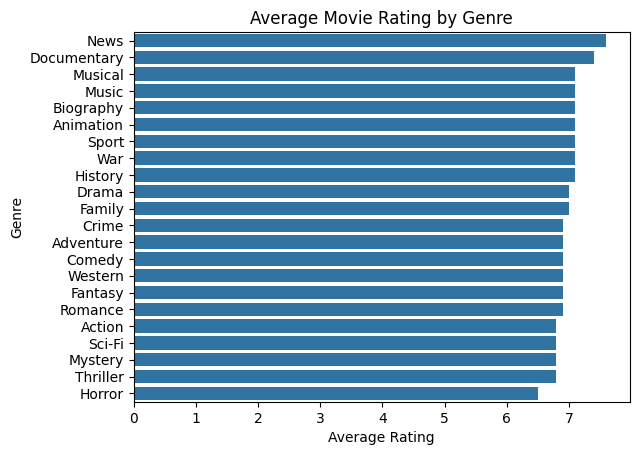

In [9]:
sns.barplot(x="averageRating", y="genre", data=avg_rating_by_genre.reset_index())
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Average Movie Rating by Genre")
plt.show()

# **Average Movie Rating by Decade**

In [10]:
df_imdb["decade"] = (df_imdb["year"] // 10)*10

df_decade = df_imdb[df_imdb["decade"]>= 1990]

avg_rating_by_decade = df_decade.groupby("decade")["averageRating"].mean().round(1).sort_index()

display(avg_rating_by_decade.reset_index())

,decade,averageRating
0,1990,7.0
1,2000,6.9
2,2010,6.9
3,2020,6.9


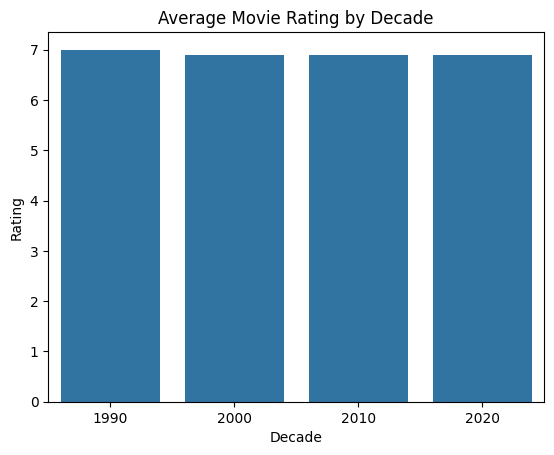

In [11]:
sns.barplot(x="decade", y="averageRating", data=avg_rating_by_decade.reset_index())
plt.xlabel("Decade")
plt.ylabel("Rating")
plt.title("Average Movie Rating by Decade")
plt.show()

# **Average Rating by Number of Films and Genre**

In [12]:
genre_ratings_count = pd.melt(
    df_imdb,
    id_vars=['averageRating',"titleID"],
    value_vars=["genre1_film","genre2_film","genre3_film"],
    value_name="genre"
).dropna(subset=["genre"])

genre_stats = genre_ratings_count.groupby("genre").agg(
    Rating=("averageRating","mean"),
    numFilms=("titleID","count")
).sort_values(by="Rating",ascending=False)

display(genre_stats.reset_index())

,genre,Rating,numFilms
0,News,7.611111,9
1,Documentary,7.423056,360
2,Biography,7.141434,502
3,Musical,7.123944,71
4,History,7.104762,336
5,Music,7.102439,246
6,Animation,7.100535,374
7,War,7.089103,156
8,Sport,7.073103,145
9,Family,6.982990,194


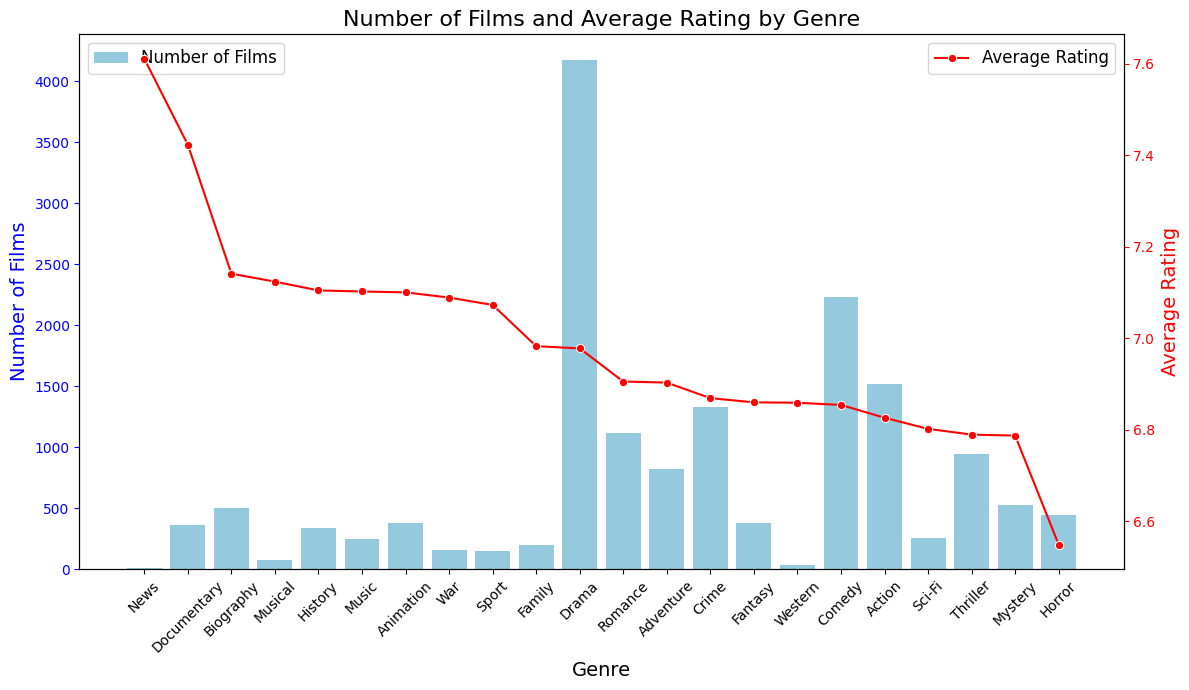

In [13]:
genre_stats_reset = genre_stats.reset_index()

fig, ax1 = plt.subplots(figsize=(12,7))

sns.barplot(
    data=genre_stats_reset,
    x="genre",
    y="numFilms",
    color="skyblue",
    ax=ax1,
    label="Number of Films"
)

ax1.set_ylabel("Number of Films", fontsize=14, color="blue")
ax1.set_xlabel("Genre", fontsize=14)
ax1.tick_params(axis="x", rotation=45)
ax1.tick_params(axis="y", colors="blue")

ax2 = ax1.twinx()
sns.lineplot(
    data=genre_stats_reset,
    x="genre",
    y="Rating",
    color="red",
    marker="o",
    ax=ax2,
    label= "Average Rating"
    )

ax2.set_ylabel("Average Rating", fontsize=14, color="red")
ax2.tick_params(axis="y", colors="red")

ax1.legend(loc="upper left", bbox_to_anchor=(0, 1), fontsize=12)
ax2.legend(loc="upper right", bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Number of Films and Average Rating by Genre", fontsize=16)


plt.tight_layout()
plt.show()

# **Top Genre per decade**

In [14]:
df_imdb['decade'] = (df_imdb['year'] // 10)*10
df_filtered = df_imdb[df_imdb['decade'] >= 1990]

genres_decade = pd.melt(
    df_filtered,
    id_vars=['decade', "averageRating"],
    value_vars=["genre1_film","genre2_film","genre3_film"],
    value_name="genre"
).dropna(subset=["genre"])

genre_rating_by_decade = genres_decade.groupby(["decade", "genre"])["averageRating"].mean().round(1).reset_index()

top_genre_by_decade = genre_rating_by_decade.loc[
    genre_rating_by_decade.groupby("decade")["averageRating"].idxmax()
]

display(top_genre_by_decade)

,decade,genre,averageRating
6,1990,Documentary,7.5
27,2000,Documentary,7.4
58,2010,News,7.8
67,2020,Animation,7.3


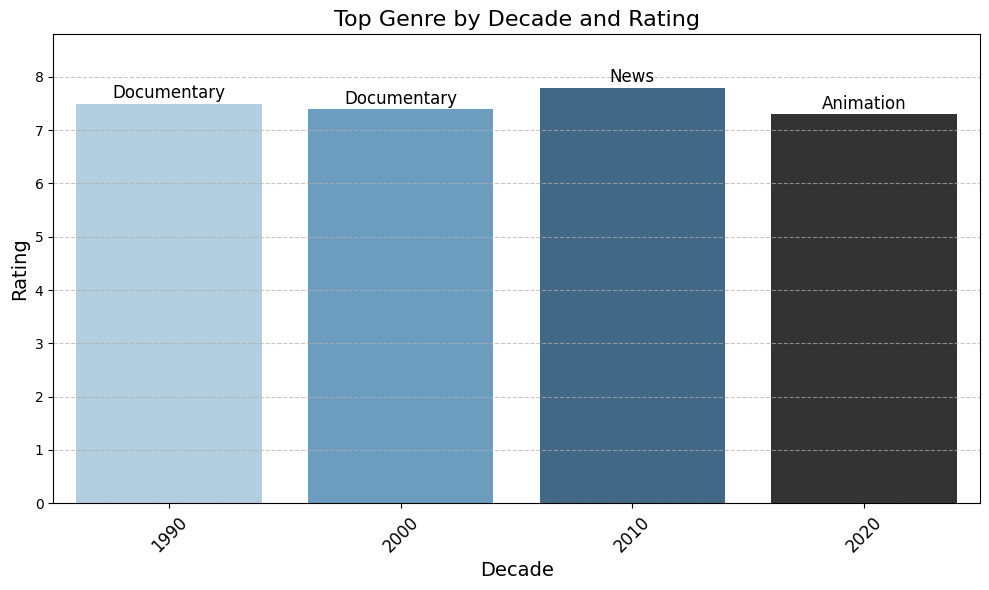

In [16]:
top_genre_per_decade_filtered = top_genre_by_decade.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genre_per_decade_filtered,
    x="decade",
    y="averageRating",
    hue='decade',
    legend=False,
    palette="Blues_d"
)

for index, row in top_genre_per_decade_filtered.iterrows():
    plt.text(
        x=index,
        y=row["averageRating"] + 0.1,
        s=row["genre"],
        ha='center',
        fontsize=12
    )


plt.title("Top Genre by Decade and Rating", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.ylim(0, top_genre_per_decade_filtered["averageRating"].max() + 1)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

Film Duration by Genre

In [17]:
genre_duration = pd.melt(
    df_imdb,
    id_vars=['duration'],
    value_vars=["genre1_film","genre2_film","genre3_film"],
    value_name="genre"
).dropna(subset=["genre"])

genre_duration_stats = genre_duration.groupby("genre")["duration"].mean().round(0).sort_values(ascending=False)

display(genre_duration_stats.reset_index())

,genre,duration
0,Musical,139.0
1,History,123.0
2,Western,120.0
3,Action,118.0
4,War,117.0
5,Biography,116.0
6,Drama,115.0
7,Romance,114.0
8,Thriller,114.0
9,Crime,114.0


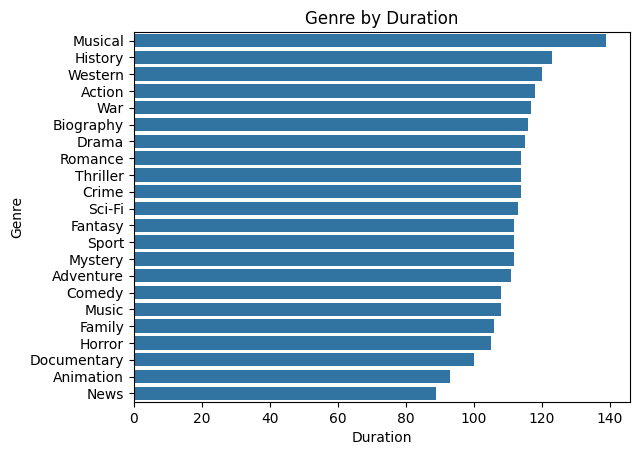

In [18]:
sns.barplot(x="duration", y="genre", data=genre_duration_stats.reset_index())
plt.xlabel("Duration")
plt.ylabel("Genre")
plt.title("Genre by Duration")
plt.show()

# **Top 5 most popular genres**

In [19]:
most_popular_genre = pd.melt(
    df_imdb,
    id_vars=['numVotes'],
    value_vars=["genre1_film","genre2_film","genre3_film"],
    value_name="genre"
).dropna(subset=["genre"])

most_popular_genre_stats = most_popular_genre.groupby("genre")["numVotes"].count().sort_values(ascending=False)

display(most_popular_genre_stats.head(5).reset_index())

,genre,numVotes
0,Drama,4174
1,Comedy,2230
2,Action,1519
3,Crime,1330
4,Romance,1117


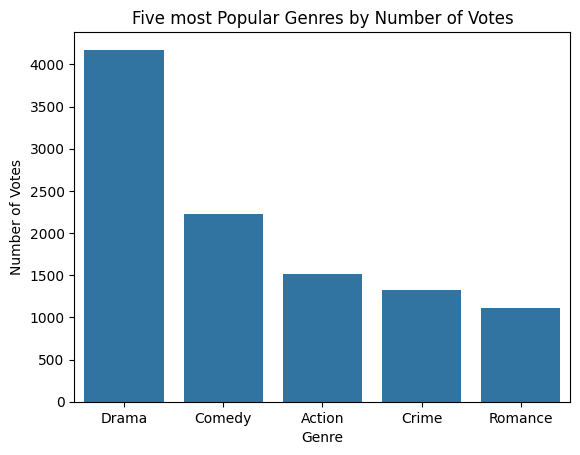

In [ ]:
sns.barplot(x="genre", y="numVotes", data=most_popular_genre_stats.head(5).reset_index())
plt.xlabel("Genre")
plt.ylabel("Number of Votes")
plt.title("Five most Popular Genres by Number of Votes")
plt.show()

# **Most Popular Director by Genre**

In [20]:
df_directors = df_imdb['name_dir'].drop_duplicates().dropna().reset_index(drop=True)

genre_rating_director = pd.melt(
    df_imdb,
    id_vars=['name_dir',"numVotes"],
    value_vars=["genre1_film","genre2_film","genre3_film"],
    value_name="genre"
).dropna(subset=["genre"])

most_popular_director_by_genre = genre_rating_director.groupby(["genre", "name_dir"])["numVotes"].sum().reset_index()

most_popular_director_per_genre = most_popular_director_by_genre.loc[
    most_popular_director_by_genre.groupby("genre")["numVotes"].idxmax()
]
top_10_directors = most_popular_director_per_genre.sort_values(by="numVotes", ascending=False).head(10)

display(top_10_directors)

,genre,name_dir,numVotes
1365,Adventure,Peter Jackson,8288416
7805,Fantasy,Peter Jackson,8288416
4412,Crime,Quentin Tarantino,6246386
147,Action,Christopher Nolan,6241816
5236,Drama,Christopher Nolan,6233118
10152,Sci-Fi,Christopher Nolan,5026452
8862,Mystery,David Fincher,4633277
11008,Thriller,Quentin Tarantino,3220698
7467,Family,David Yates,2922705
1647,Animation,John Lasseter,2833331


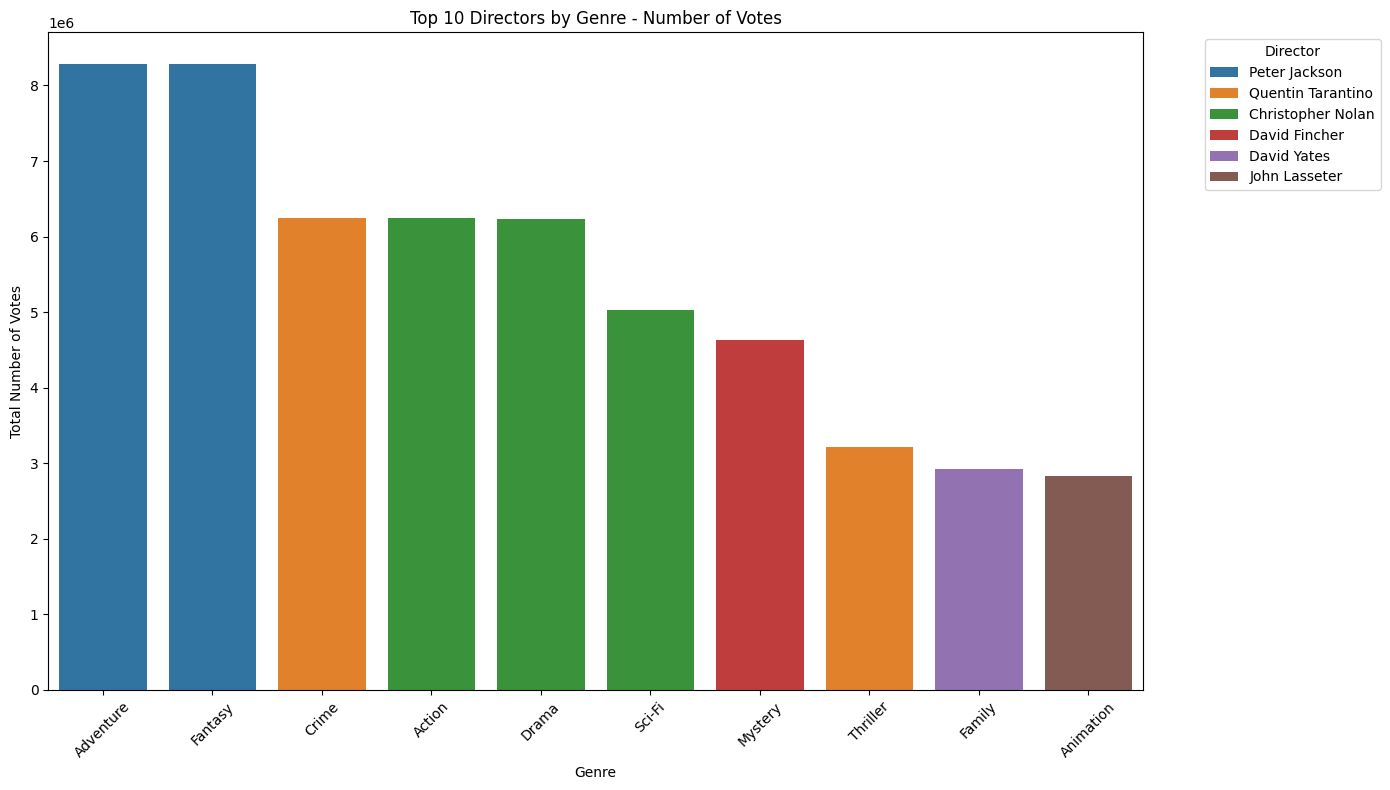

In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_10_directors,
    x='genre',
    y='numVotes',
    hue='name_dir',
    palette='tab10'
)

plt.title('Top 10 Directors by Genre - Number of Votes')
plt.xlabel('Genre')
plt.ylabel('Total Number of Votes')
plt.xticks(rotation=45)
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top Actors by Genre

In [22]:
df_imdb.columns

Index(['titleID', 'title', 'year', 'duration', 'genre1_film', 'genre2_film',
       'genre3_film', 'averageRating', 'numVotes', 'region', 'language',
       'nconst_dir', 'name_dir', 'nconst_act1', 'name_act1', 'genre_act1',
       'nconst_act2', 'name_act2', 'genre_act2', 'nconst_act3', 'name_act3',
       'genre_act3', 'decade'],
      dtype='object')

In [30]:
actor_melted = pd.melt(
    df_imdb,
    id_vars=['numVotes', 'genre1_film', 'genre2_film', 'genre3_film'],
    value_vars=['name_act1', 'name_act2', 'name_act3'],
    value_name='name_act'
).dropna(subset=['name_act'])

genre_actor_melted = pd.melt(
    actor_melted,
    id_vars=['numVotes', 'name_act'],
    value_vars=['genre1_film', 'genre2_film', 'genre3_film'],
    value_name='genre'
).dropna(subset=['genre'])


genre_rating_actor_stats = genre_actor_melted.groupby(["genre", "name_act"])["numVotes"].sum().reset_index()


top_actors_per_genre = genre_rating_actor_stats.loc[
    genre_rating_actor_stats.groupby("genre")["numVotes"].idxmax()
]

display(top_actors_per_genre.sort_values(by="numVotes", ascending=False).head(5))

,genre,name_act,numVotes
1919,Action,Robert Downey Jr.,15946721
28108,Sci-Fi,Robert Downey Jr.,15336567
3770,Adventure,Robert Downey Jr.,11304910
13957,Drama,Christian Bale,9660273
20715,Fantasy,Ian McKellen,8295474


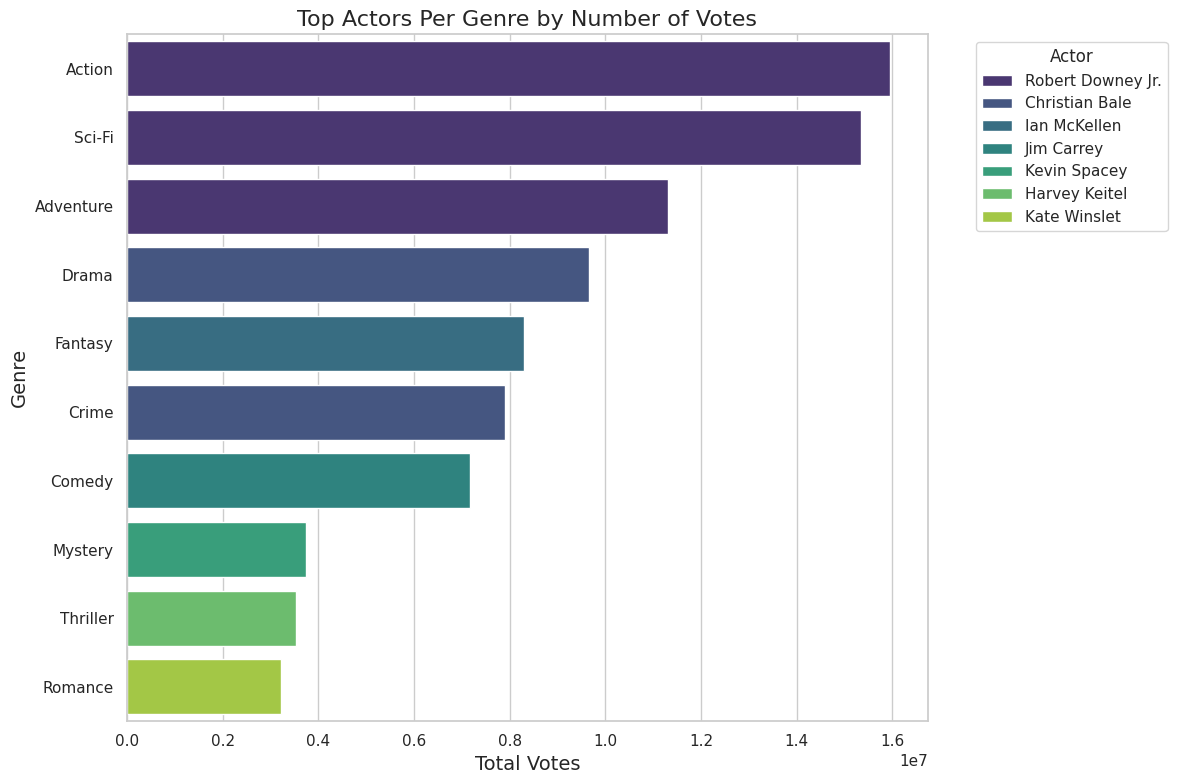

In [32]:
top_actors_per_genre_sorted = top_actors_per_genre.sort_values(by="numVotes", ascending=False).head(10)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))

bar_plot = sns.barplot(
    data=top_actors_per_genre_sorted,
    x="numVotes",
    y="genre",
    hue="name_act",
    dodge=False,
    palette="viridis"
)


plt.title("Top Actors Per Genre by Number of Votes", fontsize=16)
plt.xlabel("Total Votes", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.legend(title="Actor", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()